In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

In [2]:
url = "https://raw.githubusercontent.com/enricochandran/01.-Machine-Learning/refs/heads/main/04.%20Week%204/flu/flu.csv"
df = pd.read_csv(url)
print(df.head())

  Diagnosis InitialPCRDiagnosis   Age Sex  neutrophil  \
0      H1N1                 NaN  67.0   F         NaN   
1      H1N1                 NaN  29.0   M         NaN   
2      H1N1                 NaN  22.0   F         NaN   
3      H1N1                 NaN  20.0   F         NaN   
4      H1N1                 NaN  21.0   M         NaN   

   serumLevelsOfWhiteBloodCell  lymphocytes CReactiveProteinLevels  \
0                          NaN          NaN                    NaN   
1                          NaN          NaN                    NaN   
2                          NaN          NaN                    NaN   
3                          NaN          NaN                    NaN   
4                          NaN          NaN                    NaN   

   DurationOfIllness CTscanResults RiskFactors GroundGlassOpacity Diarrhea  \
0                NaN           NaN         NaN                NaN      NaN   
1                NaN           NaN         NaN                NaN      NaN   
2 

In [7]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
Diagnosis                         0
InitialPCRDiagnosis            1378
Age                              28
Sex                              76
neutrophil                     1379
serumLevelsOfWhiteBloodCell    1331
lymphocytes                    1326
CReactiveProteinLevels         1345
DurationOfIllness              1395
CTscanResults                  1323
RiskFactors                    1273
GroundGlassOpacity             1389
Diarrhea                       1032
Fever                           559
Coughing                        623
ShortnessOfBreath              1407
SoreThroat                      812
NauseaVomitting                1061
Temperature                     854
Fatigue                         951
dtype: int64


In [9]:
target_col = 'flu'
if target_col in df.columns:
    plt.figure(figsize=(5, 4))
    sns.countplot(x=target_col, df=df, palette='Set2')
    plt.title(f"Distribusi Label Target: '{target_col}'")
    plt.tight_layout()
    plt.show()

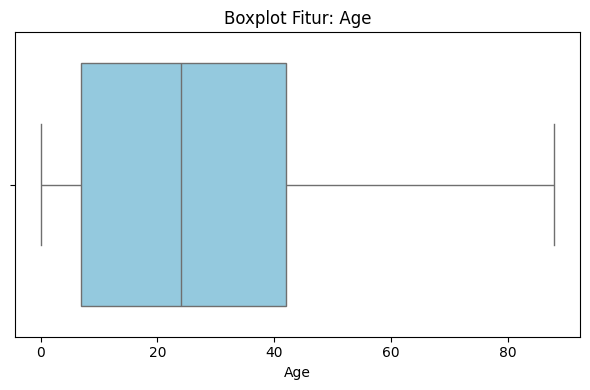

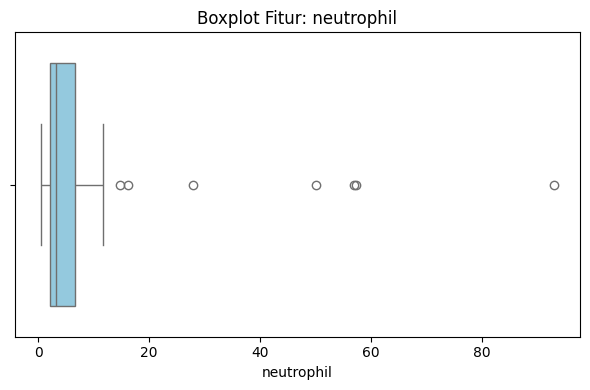

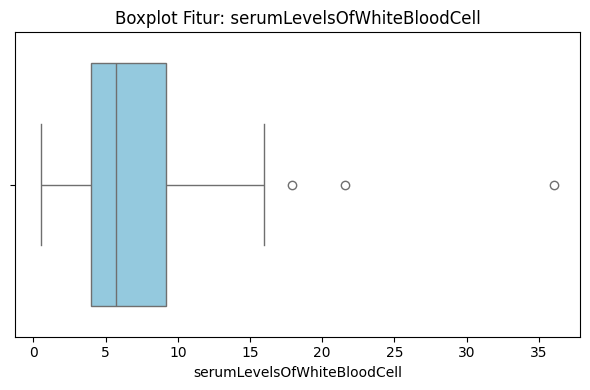

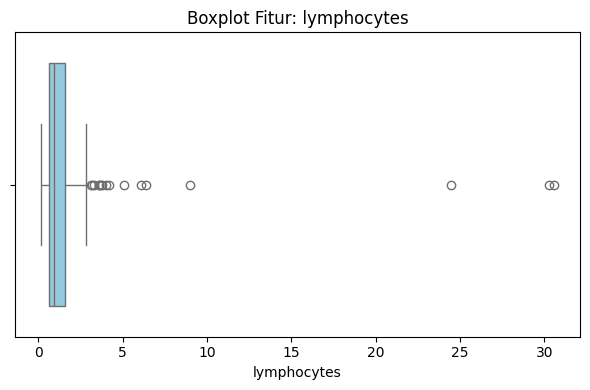

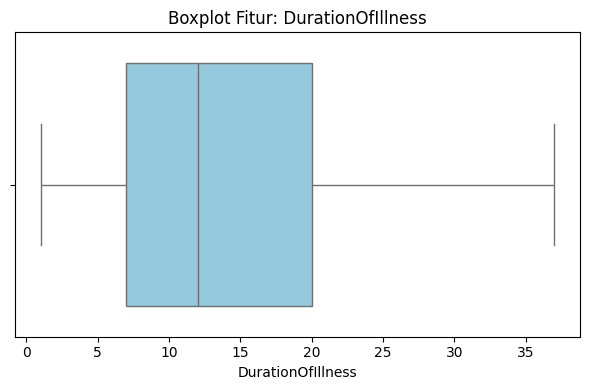

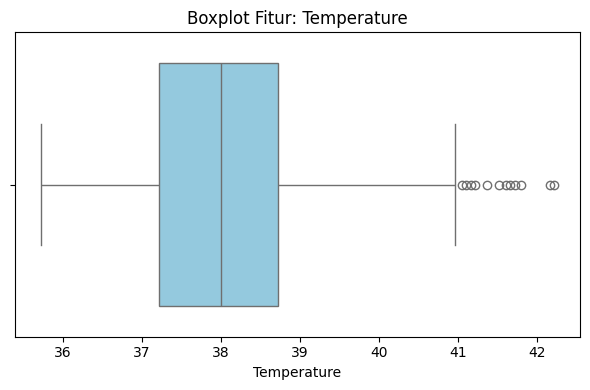

In [11]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot Fitur: {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

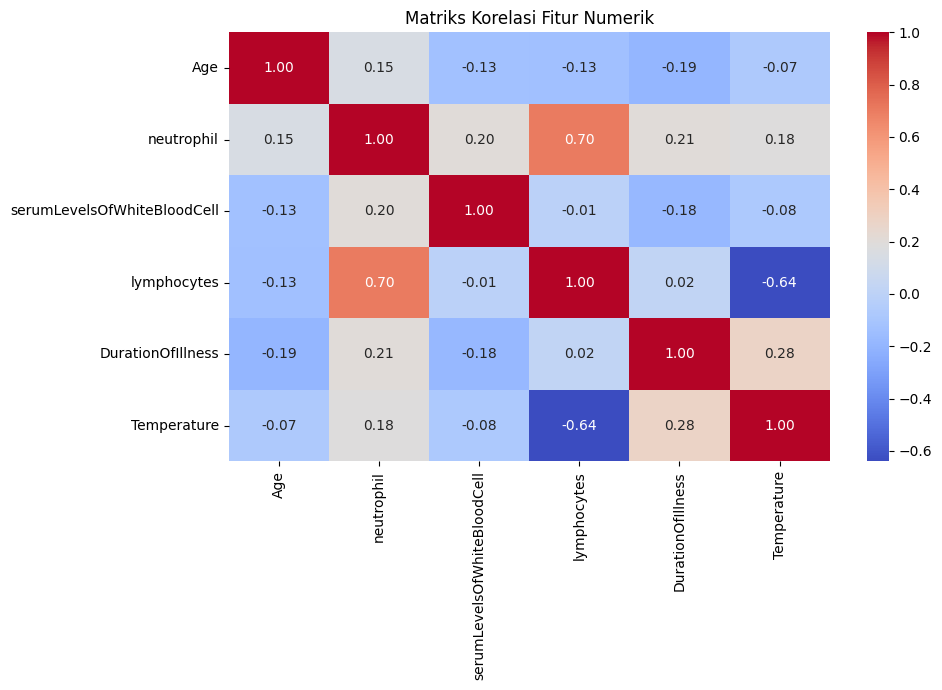

In [12]:
plt.figure(figsize=(10, 7))
correlation = df[num_cols].corr()
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Matriks Korelasi Fitur Numerik")
plt.tight_layout()
plt.show()


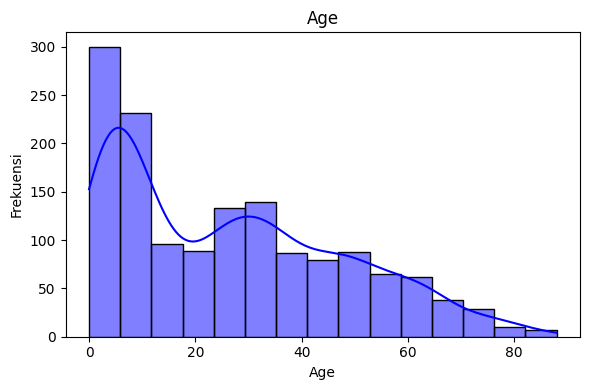

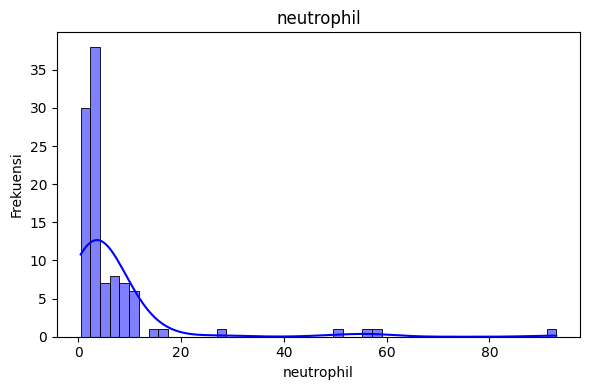

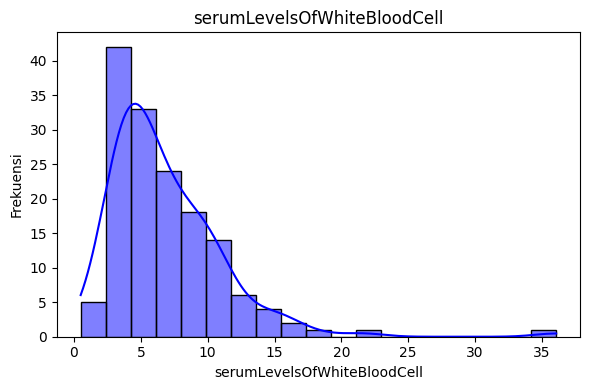

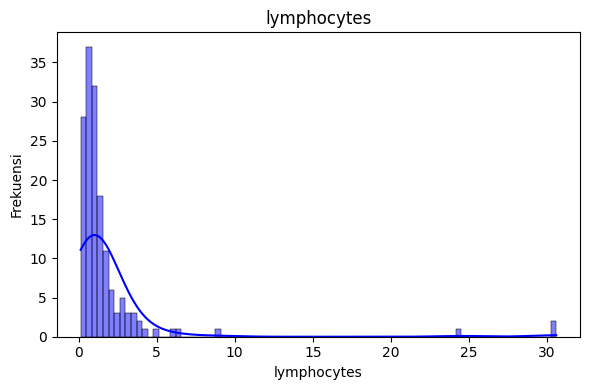

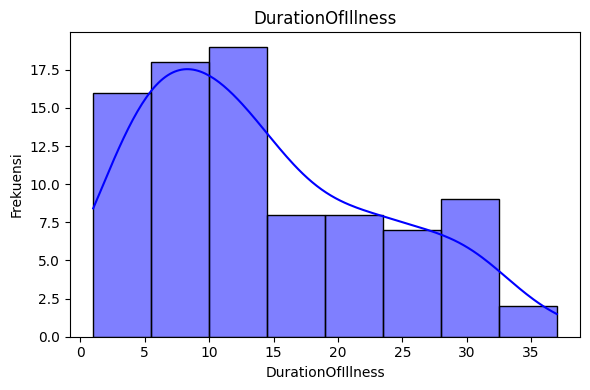

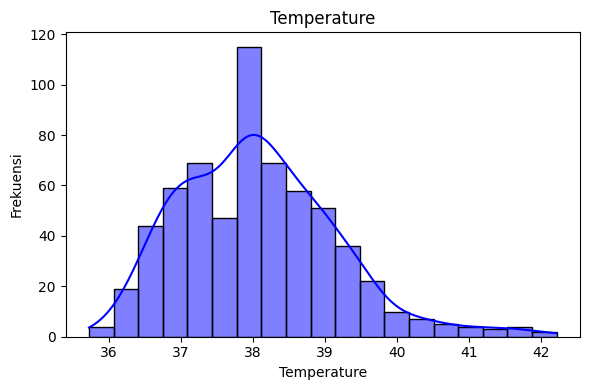

In [18]:
numerik = df.select_dtypes(include=np.number).columns.tolist()

for kolom in numerik:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[kolom], kde=True, color='blue')
    plt.title(f'{kolom}')
    plt.xlabel(kolom)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

In [34]:
df_encoded = pd.get_dummies(df, drop_first=True)

target = 'Diagnosis_H1N1'
if target not in df_encoded.columns:
    raise ValueError(f"Target '{target}' tidak ditemukan")

df_clean = df_encoded.dropna(subset=[target])
X = df_clean.drop(columns=target)
y = df_clean[target]

In [35]:
imputer = SimpleImputer(strategy='mean')
X_filled = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [36]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.60      0.71        90
        True       0.85      0.96      0.90       207

    accuracy                           0.85       297
   macro avg       0.85      0.78      0.80       297
weighted avg       0.85      0.85      0.84       297



In [37]:
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision : {precision_score(y_test, y_pred):.4f}")
print(f"Recall : {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred):.4f}")
print(f"AUC : {roc_auc_score(y_test, y_prob):.4f}")

Accuracy : 0.8485
Precision : 0.8462
Recall : 0.9565
F1-Score : 0.8980
AUC : 0.9255


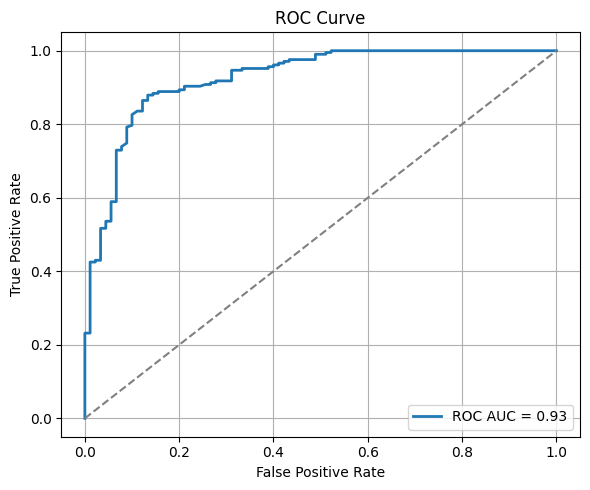

In [38]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_test, y_prob):.2f}', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


# **1. Accuracy (Akurasi)**
Accuracy mengukur seberapa sering model melakukan prediksi yang benar (baik benar positif maupun benar negatif) dibandingkan dengan total prediksi.

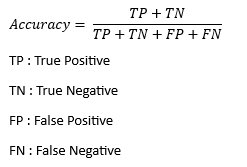

# **2. Precision (Presisi)**
Precision mengukur seberapa akurat model dalam memprediksi kelas positif. Ini adalah rasio prediksi benar positif (True Positives) terhadap semua prediksi positif (True Positives + False Positives).

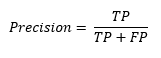

# **3. Recall (Sensitivity atau True Positive Rate)**
Recall mengukur seberapa baik model dapat mengidentifikasi semua instance positif. Ini adalah rasio prediksi benar positif (True Positives) terhadap semua instance positif yang sebenarnya (True Positives + False Negatives).

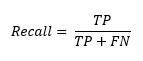

# **4. F1-Score**
F1-Score adalah harmonic mean dari Precision dan Recall. Ini memberikan keseimbangan antara Precision dan Recall.

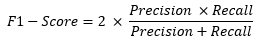

# **5. AUC-ROC (Area Under the Receiver Operating Characteristic Curve)**
AUC-ROC adalah metrik yang mengukur performa model klasifikasi dengan memplot True Positive Rate (TPR) terhadap False Positive Rate (FPR) pada berbagai threshold.

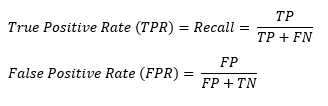

AUC adalah area di bawah kurva ROC. Nilainya berkisar antara 0 dan 1:
*   AUC = 1: Model sempurna.
*   AUC = 0.5: Model tidak lebih baik dari tebakan acak.
*   AUC < 0.5: Model performanya buruk.